In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

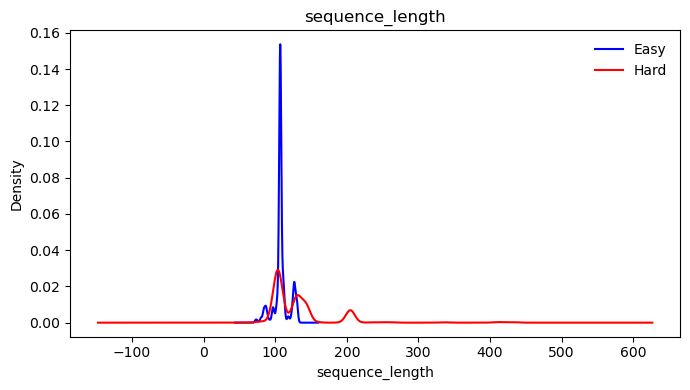

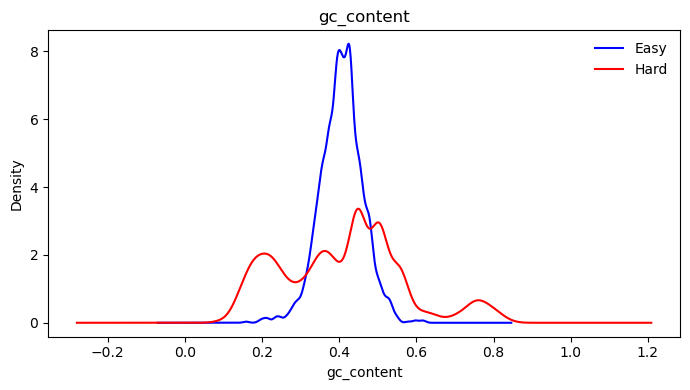

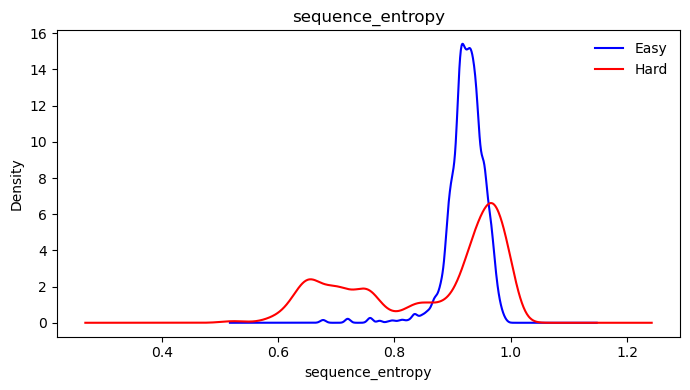

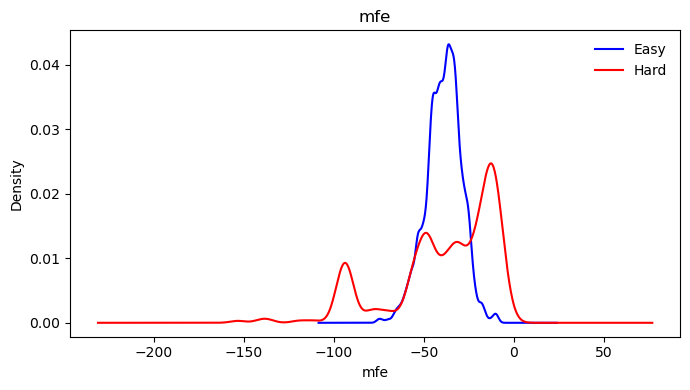

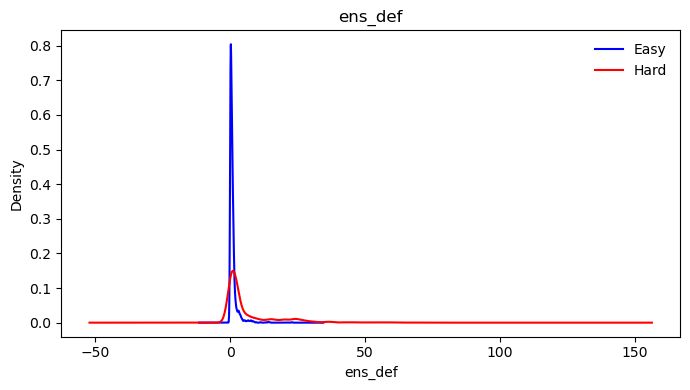

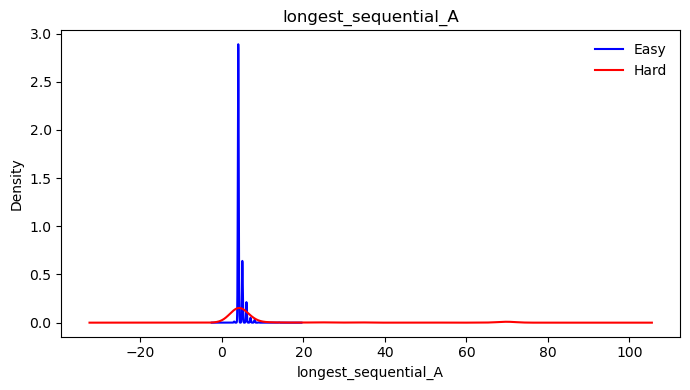

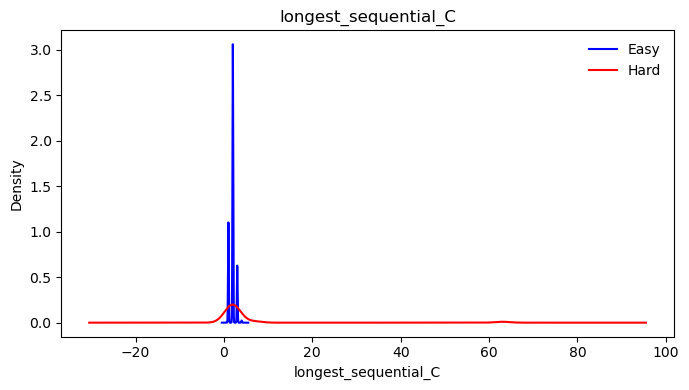

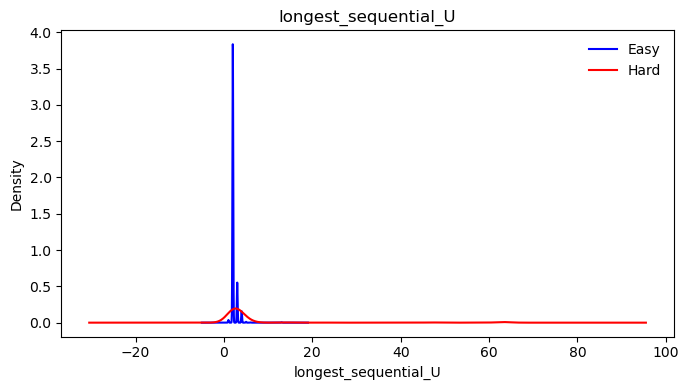

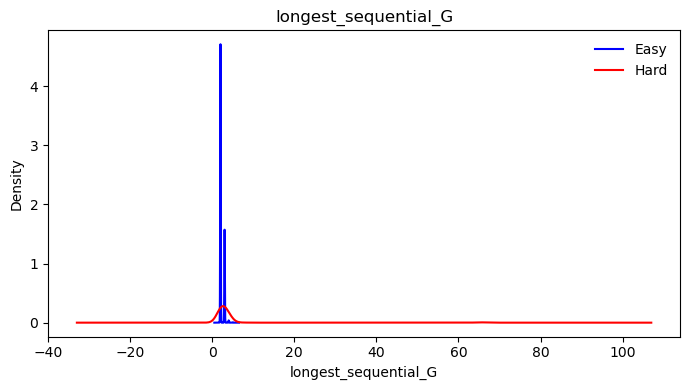

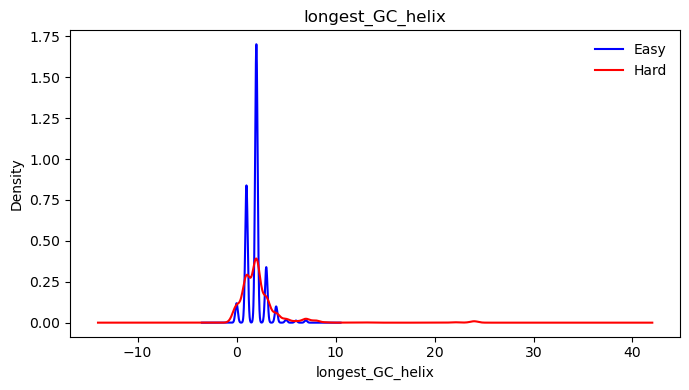

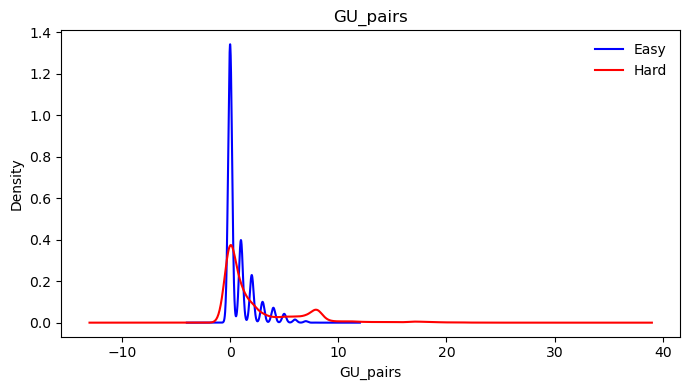

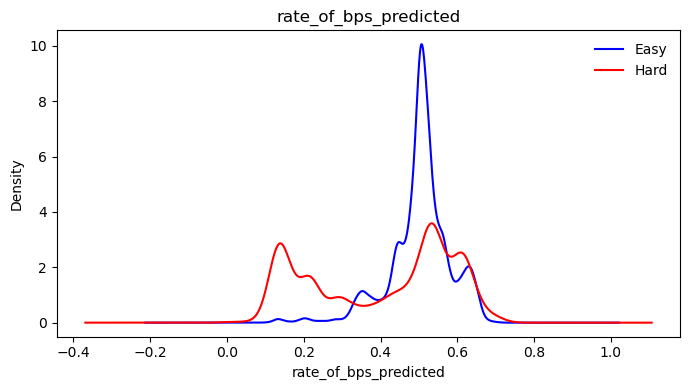

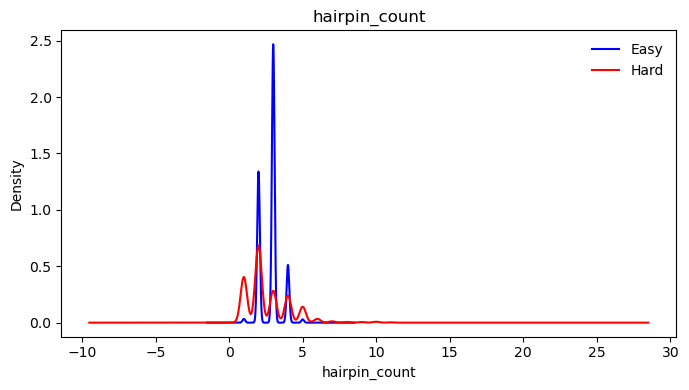

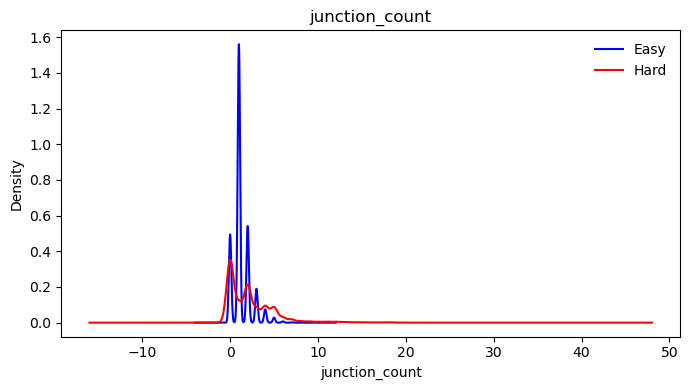

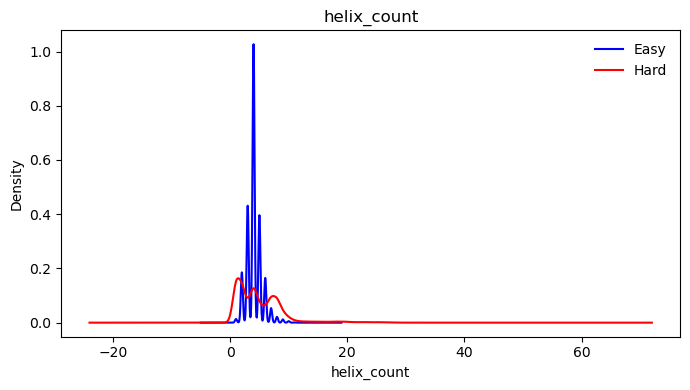

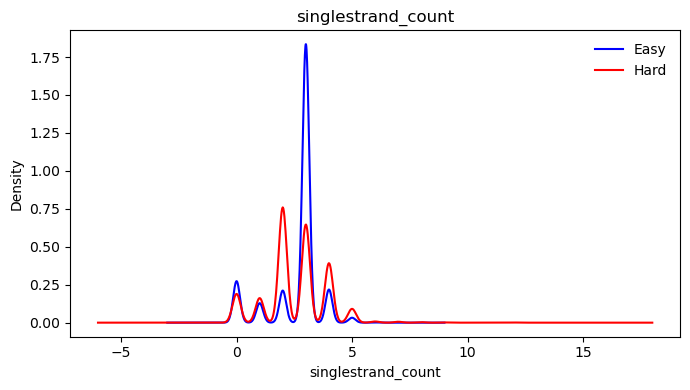

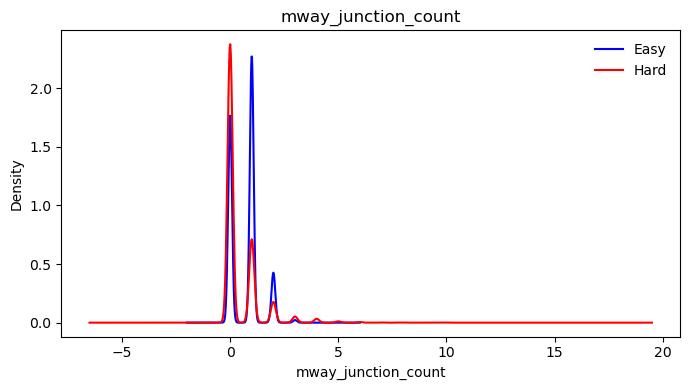

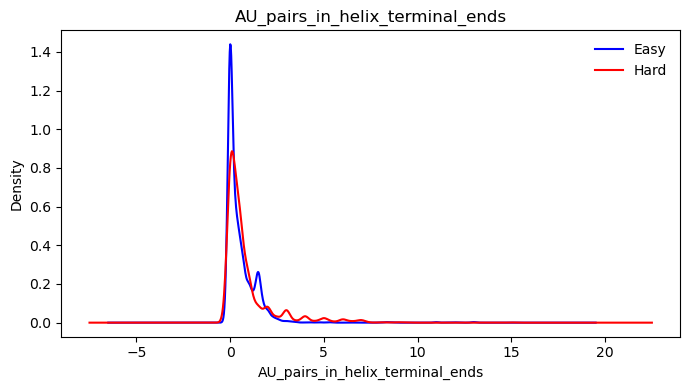

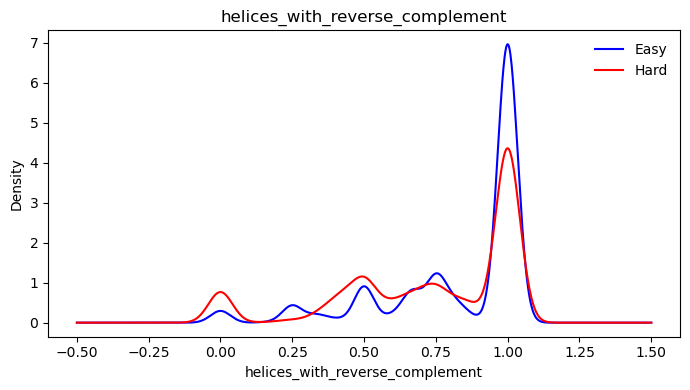

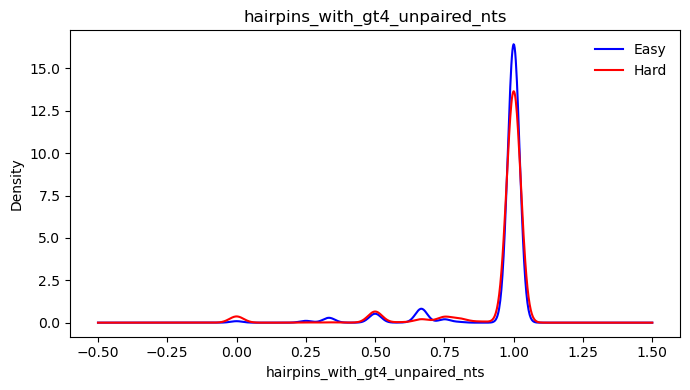

In [2]:
hard_data_path = "data/chem_map_all_hard_preds_enriched.csv"
easy_data_path = "data/chem_map_all_easy_preds_enriched.csv"

import pandas as pd
import matplotlib.pyplot as plt

# hard_data_path and easy_data_path already exist
easy_df = pd.read_csv(easy_data_path)
hard_df = pd.read_csv(hard_data_path)

cols = [
    "sequence_length","gc_content","sequence_entropy","mfe","ens_def",
    "longest_sequential_A","longest_sequential_C","longest_sequential_U","longest_sequential_G",
    "longest_GC_helix","GU_pairs","rate_of_bps_predicted","hairpin_count","junction_count",
    "helix_count","singlestrand_count","mway_junction_count","AU_pairs_in_helix_terminal_ends",
    "helices_with_reverse_complement","hairpins_with_gt4_unpaired_nts"
]

for col in cols:
    plt.figure(figsize=(7, 4))

    # Coerce to numeric and drop NaNs
    easy_vals = pd.to_numeric(easy_df[col], errors="coerce").dropna()
    hard_vals = pd.to_numeric(hard_df[col], errors="coerce").dropna()

    # KDE overlays (pandas uses matplotlib; if SciPy isn't installed, this may raise)
    easy_vals.plot(kind="kde", color="blue", label="Easy")
    hard_vals.plot(kind="kde", color="red", label="Hard")

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()
